<div style="padding:20px; 
            height: 30px;
            width: 500px;
            color:#36FF00;
            margin:10px;
            font-size:110%;
            display:fill;
            border-radius:10px;
            border-style: solid;
            border-color: #36FF00;
            background-color:#000000;
            overflow:hidden;
            font-weight:500">
            TensorFlow
            </div>

TensorFlow Python Package

<code style="background:yellow;color:red">TensorFlow Python Package</code>

<code style="background:red;color:white">
Let's Go!
</code>

<code style="background:yellow;color:red">Veriyi Hazırlamak</code>


In [1]:
# Gerekli kütüphaneleri import edelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx") # excel dosyasını oku ve df değişkenine ata

In [3]:
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


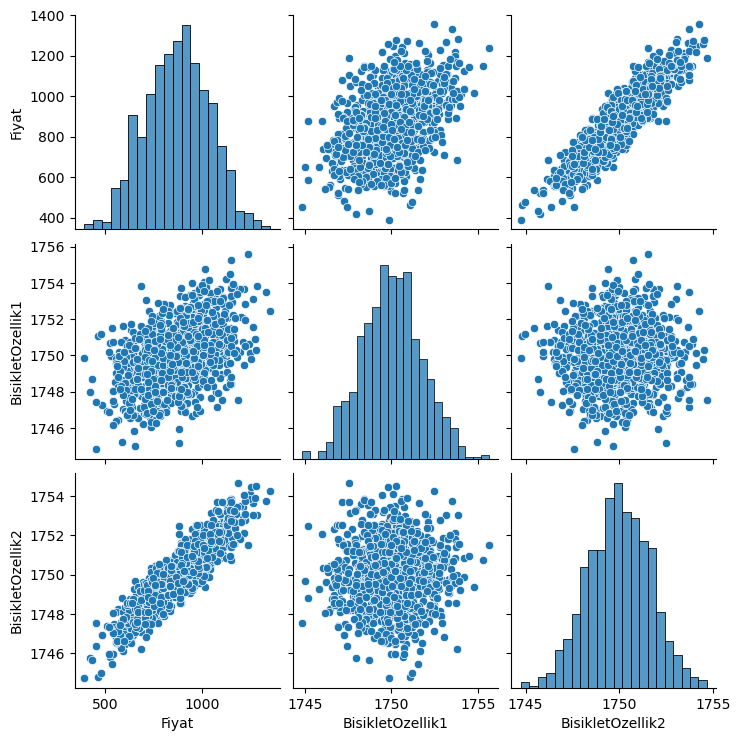

In [4]:
sns.pairplot(df) # veri setindeki tüm değişkenlerin birbirleri ile olan ilişkilerini gösterir

<code style="background:yellow;color:red">Veriyi Test ve Train olarak ikiye ayırmak</code>

In [5]:
from sklearn.model_selection import train_test_split # veri setini eğitim ve test seti olarak ayırmak için kullanılır

In [6]:
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [7]:
# y = wx + b, y --> label, x --> feature

y = df["Fiyat"].values

x = df[["BisikletOzellik1", "BisikletOzellik2"]].values

#train_test_split fonksiyonu ile veri setini train ve test olarak ayırıyoruz

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=15)  

# test_size = 0.33 veri setinin %33, random_state = 15 ise veri setinin karıştırılma algoritması

In [8]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [9]:
x_train.shape #attribute olduğundan shape kullanıldı  ve x_train in boyutu alındı

(670, 2)

In [10]:
x_test.shape

(330, 2)

In [11]:
y_train.shape

(670,)

In [12]:
y_test.shape

(330,)

<code style="background:yellow;color:red">Modeli oluşturmak</code>


Datayı scale etmemiz gerekiyor.

In [13]:
#SCALING

In [14]:
#sklearn preprocessing kütüphanesinden MinMaxScaler fonksiyonunu import ediyoruz
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler() # MinMaxScaler ile bir instance oluşturduk

In [16]:
scaler.fit(x_train) # x_train veri setini fit ediyoruz

MinMaxScaler()

In [17]:
x_train = scaler.transform(x_train) # x_train veri setini transform ediyoruz, fit ettiği veri setini x_train olarak atıyoruz

x_test = scaler.transform(x_test) # x_test veri setini transform ediyoruz

In [18]:
x_train #veriler 0-1 arasına çekildiğini görüyoruz, verilerin hepsi scale edildi

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [19]:
# Install tensorflow package
import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

2025-05-17 21:24:28.771606: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 21:24:28.779225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-17 21:24:28.788196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-17 21:24:28.790944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-17 21:24:28.798188: I tensorflow/core/platform/cpu_feature_guar

In [20]:
# Install keras packages

from keras.models import Sequential
from keras.layers import Dense

In [21]:


model = Sequential() # modeli oluşturuyoruz, kaç hidden layer olacaksa o kadar add yapılacak

model.add(Dense(7, activation="relu")) # modelin katmanlarını ekliyoruz, 4 nöron ve aktivasyon fonksiyonu relu
model.add(Dense(7, activation="relu"))
model.add(Dense(7, activation="relu"))

#çıktı katmanı

model.add(Dense(1)) # çıktı katmanı, 1 nöron

#optimizasyon fonksiyonu ve loss fonksiyonu algoritması

model.compile(optimizer="rmsprop", loss="mse") # optimizer = rmsprop, loss = mse


I0000 00:00:1747506300.490073   47029 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747506300.539504   47029 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747506300.558048   47029 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1747506300.569224   47029 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

<code style="background:yellow;color:red">Training evresi</code>

In [22]:


#batch ve epoch değerlerini belirlenmesi ve modelin eğitilmesi

model.fit(x_train, y_train, epochs=250, verbose=1) # batch bu örnekte veri seti küçük olduğundan belirtilmedi


Epoch 1/250


I0000 00:00:1747506321.705094   47536 service.cc:146] XLA service 0x773d9c0069e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747506321.705120   47536 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-05-17 21:25:21.717943: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-17 21:25:21.757436: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 8/21 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 787489.8750

I0000 00:00:1747506322.048425   47536 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 788404.1875
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 792294.2500
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 795259.7500
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 801120.8750
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 801786.0625
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 796248.8125
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 786338.9375
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 787104.6250
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 795146.6250
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 787531.8125
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 768953.3750
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 787888.1875
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 776534.3125
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss

In [23]:
model.history.history # modelin eğitim verileri


{'loss': [795671.1875,
  795270.75,
  794863.375,
  794357.0625,
  793731.6875,
  792984.9375,
  792100.0,
  791065.875,
  789879.625,
  788538.4375,
  787009.5,
  785269.375,
  783283.75,
  781050.8125,
  778519.25,
  775670.8125,
  772517.375,
  769016.5,
  765139.9375,
  760850.625,
  756172.4375,
  751060.625,
  745490.4375,
  739427.3125,
  732876.625,
  725747.5625,
  718048.875,
  709819.25,
  701034.8125,
  691620.0625,
  681559.625,
  670852.6875,
  659466.625,
  647353.125,
  634641.875,
  621208.8125,
  607069.0,
  592231.375,
  576765.625,
  560459.625,
  543449.0,
  525837.6875,
  507608.0625,
  488559.90625,
  469005.75,
  448826.6875,
  428038.15625,
  406719.71875,
  385055.25,
  362957.625,
  340466.625,
  317621.28125,
  294607.96875,
  271624.125,
  248688.1875,
  225982.09375,
  203190.5625,
  180852.890625,
  159230.921875,
  138196.9375,
  117963.2734375,
  99029.96875,
  81140.7421875,
  64717.1640625,
  50062.76953125,
  37250.09375,
  26503.46484375,
  18227.45

<Axes: >

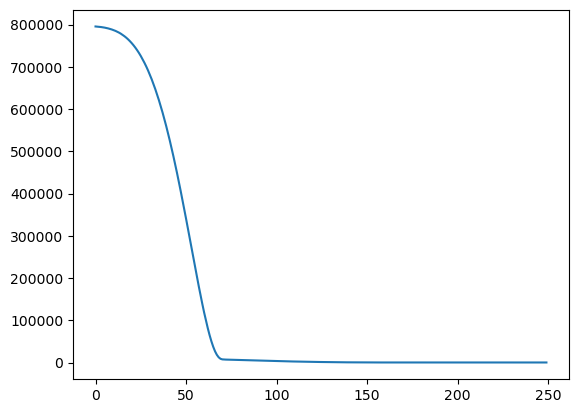

In [24]:
sns.lineplot(x=range(len(model.history.history["loss"])), y=model.history.history["loss"]) # modelin loss değerlerini gösterir

In [25]:
model.history.history["loss"] # modelin loss değerlerini gösterir

[795671.1875,
 795270.75,
 794863.375,
 794357.0625,
 793731.6875,
 792984.9375,
 792100.0,
 791065.875,
 789879.625,
 788538.4375,
 787009.5,
 785269.375,
 783283.75,
 781050.8125,
 778519.25,
 775670.8125,
 772517.375,
 769016.5,
 765139.9375,
 760850.625,
 756172.4375,
 751060.625,
 745490.4375,
 739427.3125,
 732876.625,
 725747.5625,
 718048.875,
 709819.25,
 701034.8125,
 691620.0625,
 681559.625,
 670852.6875,
 659466.625,
 647353.125,
 634641.875,
 621208.8125,
 607069.0,
 592231.375,
 576765.625,
 560459.625,
 543449.0,
 525837.6875,
 507608.0625,
 488559.90625,
 469005.75,
 448826.6875,
 428038.15625,
 406719.71875,
 385055.25,
 362957.625,
 340466.625,
 317621.28125,
 294607.96875,
 271624.125,
 248688.1875,
 225982.09375,
 203190.5625,
 180852.890625,
 159230.921875,
 138196.9375,
 117963.2734375,
 99029.96875,
 81140.7421875,
 64717.1640625,
 50062.76953125,
 37250.09375,
 26503.46484375,
 18227.453125,
 12378.40625,
 8877.193359375,
 7419.79931640625,
 7063.556640625,
 68

<Axes: >

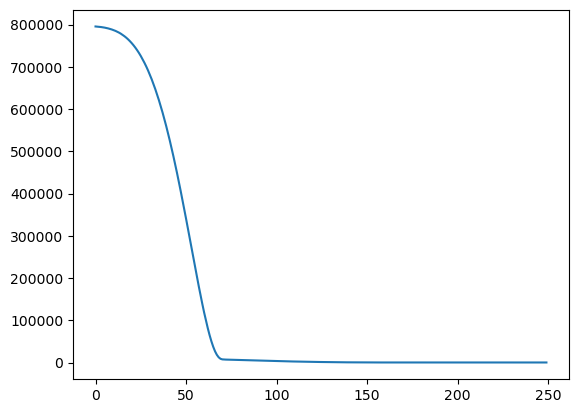

In [26]:
sns.lineplot(x = range(len(model.history.history["loss"])), y = model.history.history["loss"]) # loss değerlerini gösterir

In [27]:
model.evaluate(x_train, y_train, verbose=1) # modelin eğitim verileri ile değerlendirilmesi

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.4581


79.6815185546875

In [28]:
model.evaluate(x_test, y_test, verbose=1) # modelin test verileri ile değerlendirilmesi

 2/11 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 47.3713

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 68.2133


74.2811279296875

In [29]:
trainLoss = model.evaluate(x_train, y_train, verbose=1) # modelin eğitim verileri ile değerlendirilmesi ve trainLoss değişkenine atama

testLoss = model.evaluate(x_test, y_test, verbose=1) # modelin test verileri ile değerlendirilmesi ve testLoss değişkenine atama

 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 72.9826

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 78.4581
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 68.2133


In [30]:
trainLoss

79.6815185546875

In [31]:
testLoss

74.2811279296875

<code style="background:yellow;color:red">Modelin Değerlendirilmesi</code>

In [32]:
testTahminleri = model.predict(x_test) # modelin test verileri ile tahmin yapması    #testTahminleri değişkenine atama

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [33]:
testTahminleri

array([[1080.9401 ],
       [ 625.5059 ],
       [ 878.94604],
       [ 896.7488 ],
       [ 902.036  ],
       [ 452.76663],
       [ 934.11163],
       [ 994.0265 ],
       [ 944.0785 ],
       [1019.2937 ],
       [ 753.0099 ],
       [ 920.3562 ],
       [ 950.3011 ],
       [1057.5686 ],
       [1124.9708 ],
       [ 683.47943],
       [1130.3497 ],
       [ 652.6201 ],
       [1157.7457 ],
       [ 889.146  ],
       [ 895.2991 ],
       [ 719.0871 ],
       [ 458.16083],
       [ 613.714  ],
       [ 837.30286],
       [1094.4395 ],
       [ 715.7177 ],
       [ 759.1038 ],
       [ 875.9978 ],
       [ 772.6262 ],
       [ 452.45114],
       [ 785.1545 ],
       [ 730.2926 ],
       [ 648.5498 ],
       [ 889.3331 ],
       [ 846.12244],
       [1038.595  ],
       [1025.8435 ],
       [ 847.3163 ],
       [ 864.5807 ],
       [ 759.163  ],
       [1177.7488 ],
       [1101.1304 ],
       [1091.1171 ],
       [ 876.09247],
       [ 598.2855 ],
       [1148.9727 ],
       [ 975.

In [34]:
#tahminlerin gerçek değerler ile karşılaştırılması,
tahminDf = pd.DataFrame(y_test, columns=["Gerçek Y"]) # tahminDf değişkenine y_test verilerini ata

In [35]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [36]:
#series fonksiyonu ile testTahminleri değişkenini numpy array'den pandas serisine çevirme

testTahminleri = pd.Series(testTahminleri.reshape(330,)) # testTahminleri değişkenine reshape fonksiyonu ile boyutlandırma yapar

In [37]:
testTahminleri

0      1080.940063
1       625.505920
2       878.946045
3       896.748779
4       902.036011
          ...     
325    1016.463074
326     792.944519
327     768.193726
328    1171.035034
329     804.899414
Length: 330, dtype: float32

In [38]:
#tahminDf ve testTahminleri değişkenlerini birleştirme

tahminDf = pd.concat([tahminDf, testTahminleri], axis=1) # tahminDf ve testTahminleri değişkenlerini birleştirme, axis = 1 yatay birleştirme

In [39]:
tahminDf

,Gerçek Y,0
0,1081.652164,1080.940063
1,622.675990,625.505920
2,889.356810,878.946045
3,902.826733,896.748779
4,897.662404,902.036011
...,...,...
325,1028.438035,1016.463074
326,789.934950,792.944519
327,758.490486,768.193726
328,1172.871659,1171.035034


In [40]:
tahminDf.columns = ["Gerçek Y", "Tahmin Y"] # tahminDf değişkeninin sütun isimlerini değiştirme

In [41]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1080.940063
1,622.675990,625.505920
2,889.356810,878.946045
3,902.826733,896.748779
4,897.662404,902.036011
...,...,...
325,1028.438035,1016.463074
326,789.934950,792.944519
327,758.490486,768.193726
328,1172.871659,1171.035034


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

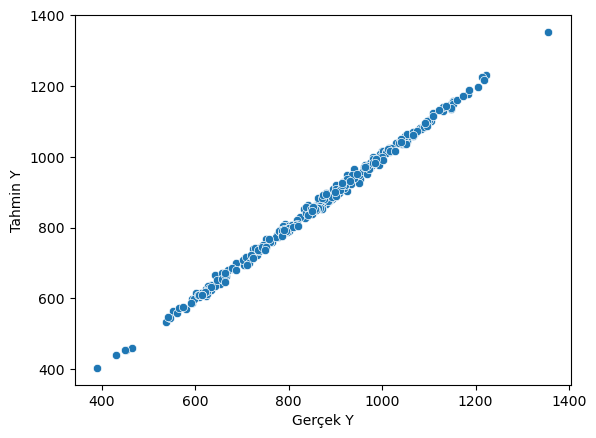

In [42]:
sns.scatterplot(x="Gerçek Y", y="Tahmin Y", data=tahminDf) # scatterplot ile tahminlerin gerçek değerler ile karşılaştırılması

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # sklearn kütüphanesinden mean_absolute_error ve mean_squared_error fonksiyonlarını import ediyoruz

In [44]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"]) # mean_absolute_error fonksiyonu ile ortalama mutlak hata hesaplama

6.9000989192140105

In [45]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"]) # mean_squared_error fonksiyonu ile ortalama karesel hata hesaplama

74.28113397390769

In [46]:
df.describe().T # veri setinin istatistiksel değerlerini gösterir

,count,mean,std,min,25%,50%,75%,max
Fiyat,1000.0,872.677801,164.124504,390.856887,757.795031,879.168705,988.612778,1355.213745
BisikletOzellik1,1000.0,1750.024800,1.704531,1744.852108,1748.831119,1750.017350,1751.115765,1755.613884
BisikletOzellik2,1000.0,1749.964733,1.659578,1744.742389,1748.803186,1750.003926,1751.129414,1754.666038


ortalama 870 lira olan fiyatta 7 lira(MAE her traininde değişiyor!) sapsak fena değil diyebiliriz. bisiklet fiyatı için bu sapma sorun olmayabilir.

>modelimiz çalışıyor diyebiliriz.

In [47]:
#yeni bir bisiklet özellikleri oluşturma
yeniBisikletOzellikleri = [[1751, 1749]] #dizinin içinde bir dizi oluşturularak ek yeni bisiklet özellikleri oluşturulabilir

In [48]:
#yeniBisikletOzellikleri değişkenini scale etmek için  transform etme

yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [49]:
#predict fonksiyonu ile tahmin yapma

model.predict(yeniBisikletOzellikleri) # modelin yeniBisikletOzellikleri ile tahmin yapması

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[829.29834]], dtype=float32)

In [50]:
#MODELİ KAYDETME

from keras.models import load_model # keras kütüphanesinden load_model fonksiyonunu import ediyoruz

In [119]:

model.save("bisiklet_modeli.h5") # modeli kaydetme , bu formatı yüklerken sıkıntı çıktı, function mse could not be located

In [51]:
#keras native formatında modeli kaydetme
model.save("bisiklet_modeli.keras") # modeli kaydetme

In [52]:
from keras import backend as K
from keras.saving import register_keras_serializable
from keras.models import load_model

@register_keras_serializable()
def mse(y_true, y_pred):
	return K.mean(K.square(y_pred - y_true), axis=-1)

laterCalledModel = load_model("bisiklet_modeli.h5", custom_objects={'mse': mse}) # modeli yükleme

Made changes.

In [53]:
sonradanCagrilanModel = load_model("bisiklet_modeli.keras") # modeli yükleme*********

In [54]:
sonradanCagrilanModel.predict(yeniBisikletOzellikleri) # sonradanCagrilanModel ile tahmin yapma

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[829.29834]], dtype=float32)

In [55]:
(5.43 * 10**9)*1*12*24 #amd ryzen 9 7900 peak flops



1563840000000.0

In [56]:
x = [1,2,3,4]
y = [ sum(x[0:i-1]) for i in range(0,4) ]



In [57]:
y

[6, 0, 1, 3]

# <code style="background:red;color:white"> Araba Fiyatları Analizi </code>

## <code style="background:yellow;color:red">TensorFlow : Araba Analizi</code>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df = pd.read_excel("merc.xlsx")

In [60]:
df.head() # veri setinin ilk 5 satırını gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [61]:
df.tail() # veri setinin son 5 satırını gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0
13118,2019,54999,Automatic,2075,145,52.3,2.9


In [62]:
df.describe().T # veri setinin istatistiksel değerlerini gösterir

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


<code style="background:yellow;color:red">Veriyi Anlamak</code>

In [63]:
#null değerlerin kontrolü

df.isnull() # null değerlerin kontrolü

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [64]:
df.isnull().sum() # null değerlerin toplamını gösterir, bu veri setinde null değer yok olduğunu görüyoruz

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<code style="background:yellow;color:red">Grafiksel Analizler</code>

<Axes: xlabel='price', ylabel='Count'>

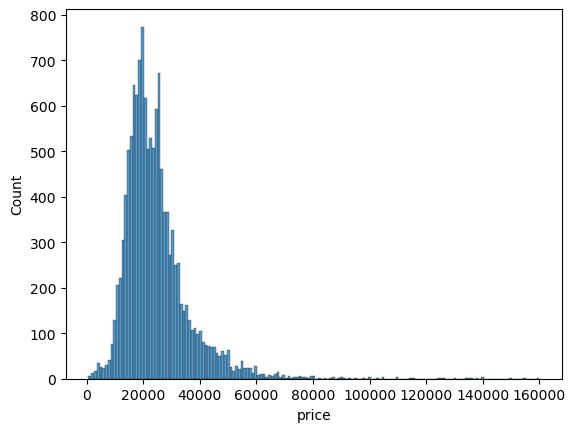

In [65]:
#seaborn ile distplot çizelim, distplot is depracated olduğu için histplot,kedplot combo kullanıldı
#ilk olarak histplot ile price değişkeninin histogramını çizdirelim

sns.histplot(df["price"]) # price değişkeninin histogramını çizdirir

<Axes: xlabel='price', ylabel='Density'>

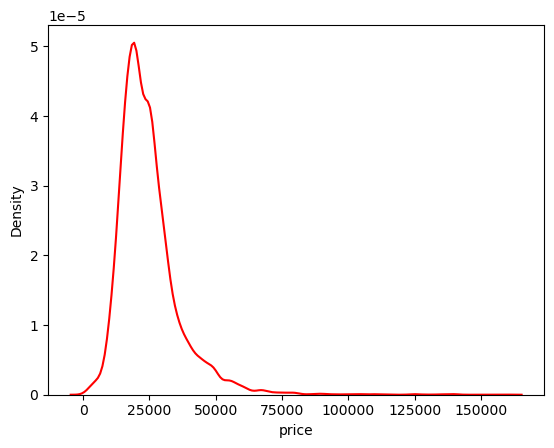

In [66]:
#sonra kdeplot ile price değişkeninin yoğunluk grafiğini çizdirelim, kde : kernel density estimation

sns.kdeplot(df["price"], color="red") # price değişkeninin yoğunluk grafiğini çizdirir

<Axes: xlabel='price', ylabel='Count'>

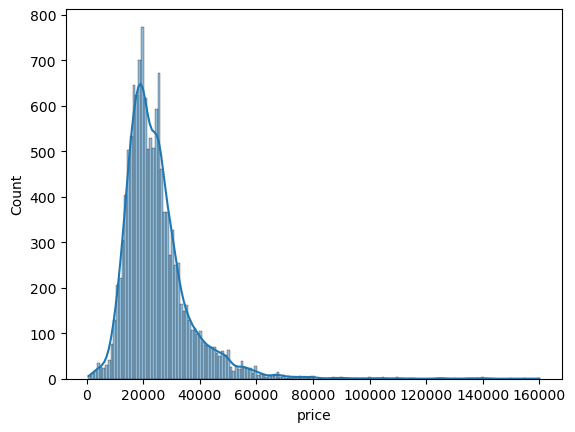

In [67]:
#histplot ve kdeplot birleştirilerek price değişkeninin histogram ve yoğunluk grafiğini çizdirelim

sns.histplot(df["price"], kde=True) # price değişkeninin histogram ve yoğunluk grafiğini çizdirir

<Figure size 700x500 with 0 Axes>

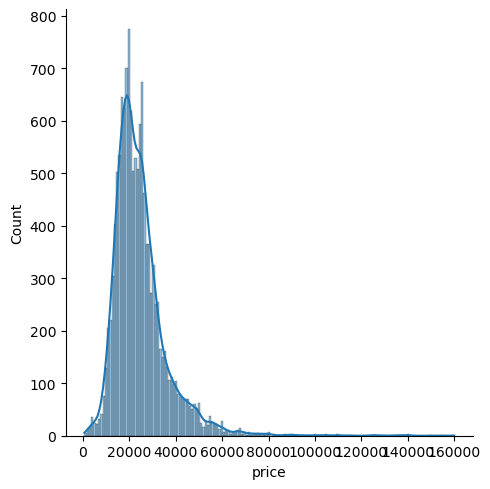

In [68]:
#displot ile price değişkeninin histogram ve yoğunluk grafiğini çizdirelim

#sns.displot( df, kind="hist", kde=True, x="price") # price değişkeninin histogram ve yoğunluk grafiğini çizdirir

plt.figure(figsize=(7,5)) # figure boyutunu belirleme 

sns.displot(df["price"], kind="hist", kde=True) # price değişkeninin histogram ve yoğunluk grafiğini çizdirir

<Axes: xlabel='year', ylabel='count'>

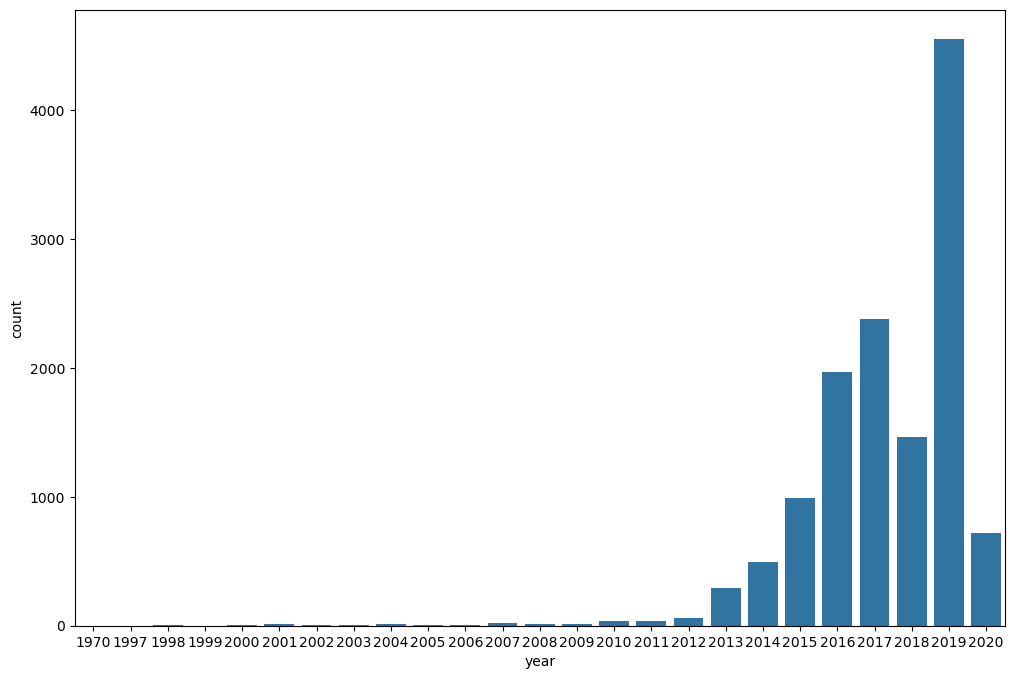

In [69]:
#hangi yılın kaç adet olduğunu gösteren countplot çizdirelim

plt.figure(figsize=(12,8)) # figure boyutunu belirleme

sns.countplot(x="year", data=df) # year değişkeninin countplotunu çizdirir

In [70]:
# bu verilerin birbirleri arasında ki korelasyonlarına bakalım

df.select_dtypes(include=[np.number]).corr() # sadece sayısal verileri seçip korelasyon hesaplama, transmission sutunu sayısal olmadığı için çıkarıldı

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [71]:
# sadece fiyat değişkeninin diğer değişkenler ile olan korelasyonlarına bakalım

df.select_dtypes(include=[np.number]).corr()["price"].sort_values() # price değişkeninin diğer sayısal değişkenler ile olan korelasyonlarına bakar ve sıralar

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<Axes: xlabel='year', ylabel='price'>

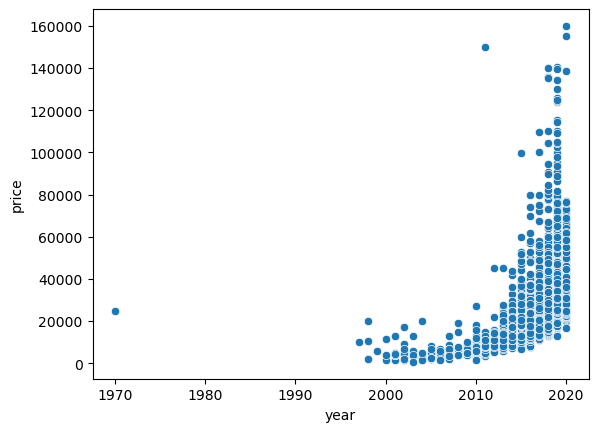

In [72]:
#scatterplot ile price değişkeninin diğer değişkenler ile olan ilişkisini gösterelim

sns.scatterplot(x="year", y="price", data=df) # year ve price değişkenlerinin scatterplotunu çizdirir)

<Axes: xlabel='mileage', ylabel='price'>

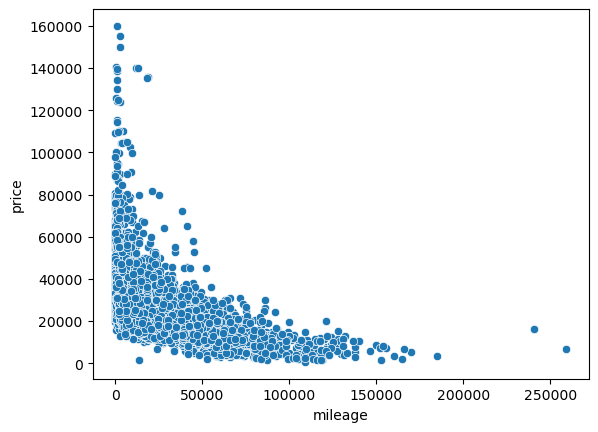

In [73]:
sns.scatterplot(x="mileage", y="price", data=df) # mileage ve price değişkenlerinin scatterplotunu çizdirir

In [74]:
df.sort_values("price", ascending=False).head(20) # price değişkenine göre büyükten küçüğe sıralar ve ilk 20 değeri gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [75]:
df.sort_values("price", ascending=True).head(20) # price değişkenine göre küçükten büyüğe sıralar ve ilk 20 değeri gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
12594,2004,1495,Manual,119000,300,34.5,1.8
11549,2002,1495,Automatic,13800,305,39.8,2.7
12710,2006,1695,Automatic,153000,300,33.6,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11808,1998,1990,Automatic,113557,265,32.1,2.3


In [76]:
len(df) # veri setinin uzunluğunu gösterir

13119

In [77]:
#bir verinin %99'lık kısmını aldığımızda genelde işlemlere bozulmadan outlier'ları temizleyerek devam edebilriz 

len(df) * 0.01 # veri setinin %1'lik kısmını gösterir

131.19

In [78]:
#yüksek fiyatlı araçlar outlier olarak dağılımı bozduğu için en yüksek fiyatlı %1'lik kısmı bulalım ve atalım

yuzdeDoksanDokuzDf = df.sort_values("price", ascending=False).iloc[131:] # price değişkenine göre büyükten küçüğe sıralar ve ilk 131 değeri atar    #iloc[131:] 131. indisten sonrasını alır

In [79]:
yuzdeDoksanDokuzDf # yuzdeDoksanDokuzDf değişkenini gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8083,2018,64999,Semi-Auto,41102,145,23.0,5.5
...,...,...,...,...,...,...,...
12594,2004,1495,Manual,119000,300,34.5,1.8
11549,2002,1495,Automatic,13800,305,39.8,2.7
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [80]:
yuzdeDoksanDokuzDf.describe().T # yuzdeDoksanDokuzDf değişkeninin istatistiksel değerlerini gösterir

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2


<Figure size 1200x800 with 0 Axes>

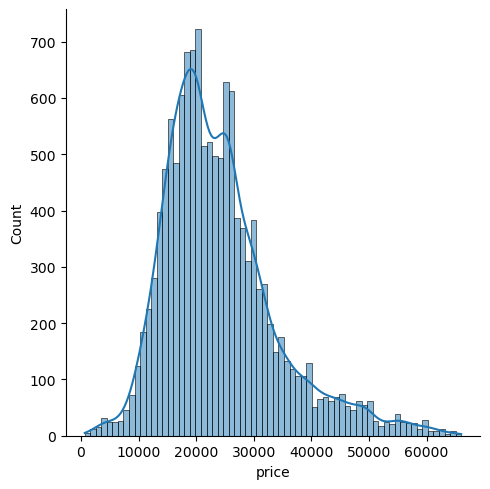

In [81]:
plt.figure(figsize=(12,8)) # figure boyutunu belirleme

sns.displot(yuzdeDoksanDokuzDf["price"], kind="hist", kde=True) # yuzdeDoksanDokuzDf değişkeninin histogram ve yoğunluk grafiğini çizdirir

#artık daha normal bir dağılım elde edeceğiz

In [82]:
#orijinal df aynen duruyor, hangi veriyi kullanmak istiyorsak onu seçebiliriz

df.describe().T # df değişkeninin istatistiksel değerlerini gösterir

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [83]:
#numeric_only=True ile sadece sayısal verileri alır, transmisson column string literaller içerdiği için yoksa hata verdiriyor

df.groupby("year").mean(numeric_only=True)["price"] # year değişkenine göre gruplayıp price değişkeninin ortalamasını alır

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [84]:
df99 = yuzdeDoksanDokuzDf # yuzdeDoksanDokuzDf değişkenini df99 değişkenine atar

In [85]:
df99.groupby("year").mean(numeric_only=True)["price"] # year değişkenine göre gruplayıp price değişkeninin ortalamasını alır

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [86]:
#1970 yılı verilerini çıkarmayı düşünebiliriz.

df99[df99.year != 1970].groupby("year").mean(numeric_only=True)["price"] # year değişkenine göre gruplayıp price değişkeninin ortalamasını alır

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [87]:
df99 = df99[df99.year != 1970] # year değişkeni 1970 olan verileri çıkarır

In [88]:
df99.groupby("year").mean(numeric_only=True)["price"] # year değişkenine göre gruplayıp price değişkeninin ortalamasını alır

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [89]:
df99.head() # df99 değişkeninin ilk 5 satırını gösterir

,year,price,transmission,mileage,tax,mpg,engineSize
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8083,2018,64999,Semi-Auto,41102,145,23.0,5.5


In [90]:
#transmission değişkenini düşürelim

df99 = df99.drop("transmission", axis=1) # transmission kolonu/değişkenini çıkarır

In [91]:
df99.head() # df99 dataframe'nin ilk 5 satırını gösterir, transmisson kolonu düşürülmüş hali

,year,price,mileage,tax,mpg,engineSize
5779,2020,65990,999,145,28.0,4.0
6177,2019,65990,5076,150,30.4,3.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8083,2018,64999,41102,145,23.0,5.5


<code style="background:yellow;color:red">Modeli Oluşturmak</code>

artık regresyona girmeye hazırız.

numpy dizilerini oluşturacağız

sklearn kullanarak test ve train verilerini split yapacağız

scaling işlemlerini yapacağız

sonra model oluşturulup, eğitilecek

In [92]:
#numpy array'e çevirme işlemleri

Y = df99["price"].values # price değişkenini Y değişkenine atar

X = df99.drop("price", axis=1).values # price kolonunu düşürüp price değişkeni hariç tüm değişkenleri X değişkenine atar

In [93]:
Y


array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [94]:
X

array([[2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [95]:
#scikit-learn kütüphanesinden train_test_split fonksiyonunu import ediyoruz

from sklearn.model_selection import train_test_split    # veri setini eğitim ve test seti olarak ayırmak için kullanılır

In [96]:
#train_test_split fonksiyonu ile veri setini train ve test olarak ayırıyoruz

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10) # veri setini train ve test olarak ayırır

In [97]:
#SCALING

len(x_train) # x_train değişkeninin uzunluğunu gösterir

9090

In [98]:
len(x_test) # x_test değişkeninin uzunluğunu gösterir

3897

In [99]:
#scaling işlemini yapmak için preprocessing kütüphanesinden MinMaxScaler fonksiyonunu import ediyoruz

from sklearn.preprocessing import MinMaxScaler

In [100]:
#bu fonksiyon ile MinMaxScaler sınıfından bir instance oluşturuyoruz

scaler = MinMaxScaler() # MinMaxScaler sınıfından bir instance oluşturma

In [101]:
x_train = scaler.fit_transform(x_train) # x_train veri setini fit ediyoruz ve transform ediyoruz

In [102]:
x_test = scaler.transform(x_test) # x_test veri setini transform ediyoruz

In [103]:
from keras.models import Sequential # keras kütüphanesinden Sequential fonksiyonunu import ediyoruz  
from keras.layers import Dense # keras kütüphanesinden Dense fonksiyonunu import ediyoruz

In [104]:
x_train.shape # x_train değişkeninin boyutunu gösterir

(9090, 5)

In [105]:
model = Sequential() # modeli oluşturuyoruz

model.add(Dense(12, activation="relu")) # modelin katmanlarını ekliyoruz, 12 nöron ve aktivasyon fonksiyonu relu
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))



model.add(Dense(1)) # çıktı katmanı, 1 nöron


model.compile(optimizer="adam", loss="mse") # optimizer = adam, loss = mse



In [106]:
#batch ve epoch değerlerini belirlenmesi ve modelin eğitilmesi

model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300, verbose=1) # batch = 250, epoch = 300


#validasyon verisini direk modelin içerisine daha eğitilirken verilerek valide edilebiliyor. bu x_test ve y_test kıyaslama işlemlerini çok kolay hala getirir
# validation_data ile test verileri ile modelin değerlendirilmesi

Epoch 1/300


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 665912768.0000 - val_loss: 688075328.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 670165632.0000 - val_loss: 687976768.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 671354624.0000 - val_loss: 687632000.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 671535232.0000 - val_loss: 686520000.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 663885568.0000 - val_loss: 683433920.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 665959424.0000 - val_loss: 676109248.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 660899520.0000 - val_loss: 660673024.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 636545216.0000 - val_loss: 631921088.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 610182336.0000 - val_loss: 583966144.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 552530560.0000 - val_los

In [107]:
#grafiğe bakarak modelin loss değerlerini görebiliriz

loss_data = pd.DataFrame(model.history.history) # modelin history'sini loss_data değişkenine atar

In [108]:
loss_data.head() # loss_data değişkeninin ilk 5 satırını gösterir

,loss,val_loss
0,672130624.0,688075328.0
1,672073408.0,687976768.0
2,671885824.0,687632000.0
3,671248640.0,686520000.0
4,669359040.0,683433920.0


<Axes: >

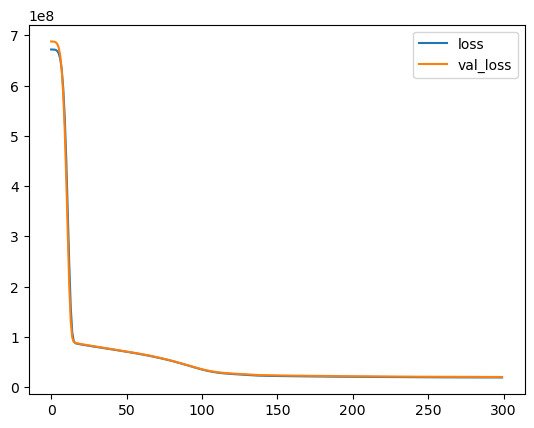

In [109]:
#hem normal loss hem de validation loss değerleri gözüküyor

loss_data.plot() # loss_data değişkeninin grafiğini çizdirir

epochsi fazla verseydik,overfitting olabiliyor.

eğer grafikte lossların ve validation lossların bir yerden sonra ayrıldığını görüyorsak, loss aşağı inerken val loss yukarı gidiyorsa o zaman diyeceğiz ki ortada bir sıkıntı var. overfitting problemi,epochsı azaltmak ya da modeli yeniden baştan kurmak /  oluşturmak lazım.

In [110]:
#modelin eğitim verileri ile değerlendirilmesi, mse mae'yi hesaplayıp bazı tahminler yapıp bazı kıyaslamalar gerçekleştirmemiz gerekiyor.

from sklearn.metrics import mean_absolute_error, mean_squared_error 
# sklearn kütüphanesinden mean_absolute_error ve mean_squared_error fonksiyonlarını import ediyoruz

In [111]:
est_array = model.predict(x_test) # modelin x_test verileri ile tahmin yapması

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [112]:
est_array # est_array değişkenini gösterir

array([[19158.057],
       [23247.78 ],
       [27055.832],
       ...,
       [25525.19 ],
       [20496.545],
       [34272.273]], dtype=float32)

In [113]:
mean_absolute_error(y_test, est_array) # mean_absolute_error fonksiyonu ile ortalama mutlak hata hesaplama

3164.9006624755402

In [114]:
df99["price"].describe() # df99 değişkeninin price değişkeninin istatistiksel değerlerini gösterir

count    12987.000000
mean     24074.855779
std       9866.601115
min        650.000000
25%      17355.000000
50%      22299.000000
75%      28706.000000
max      65990.000000
Name: price, dtype: float64

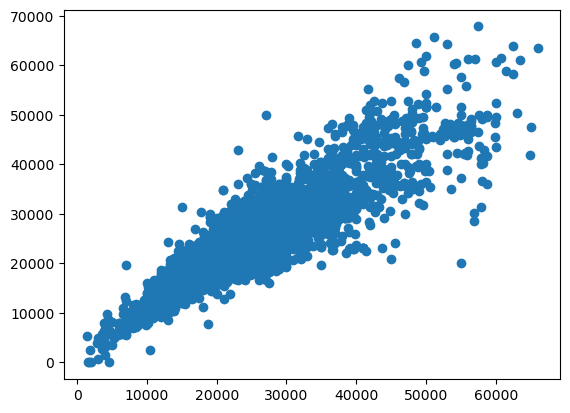

In [115]:
plt.scatter(y_test, est_array) # y_test ve est_array değişkenlerinin scatterplotunu çizdirir

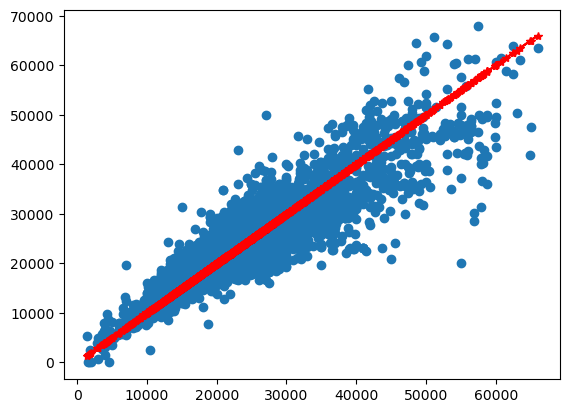

In [116]:
plt.scatter(y_test, est_array) # y_test ve est_array değişkenlerinin scatterplotunu çizdirir

plt.plot(y_test, y_test, "r-*") # y_test ve y_test değişkenlerinin grafiğini çizdirir

In [117]:
df99.iloc[2] # df99 değişkeninin 2. satırını gösterir

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [118]:
newcarserisi = df99.drop("price", axis=1).iloc[2] # price seri değişkeninden 2. satırı çıkarır

In [119]:
type(newcarserisi)

pandas.core.series.Series

In [120]:
newcarserisi = scaler.transform(newcarserisi.values.reshape(-1,5)) # newcarserisi değişkenini scale eder, numpy dizisine çevirmemiz lazım

In [121]:
model.predict(newcarserisi) # modelin newcarserisi ile tahmin yapması

#yukardaki araba price verisini çıkararak, yeni arabaymış ekledik ve tahmin yaptık

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[62464.938]], dtype=float32)

modelimizde katmanlarla, sayılarla veya epochsla oynarsak daha iyi sonuçlar elde edebilriz.

kaggle üzerinden tensorflow ile çalışabileceğimiz datasetler üzerinden eğitimlere devam edebiliriz kendimizi geliştirmek için. teoriyi daha derinden öğrenmek gerekiyor.

# <code style="background:red;color:white"> TensorFlow Sınıflandırma</code>

## <code style="background:yellow;color:red">Sınıflandırma Verileri</code>

In [122]:
import numpy as np
import pandas as pd

In [123]:
df = pd.read_excel("maliciousornot.xlsx")

In [124]:
df

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [125]:
df.info() # veri setinin bilgilerini gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [126]:
df.describe().T # veri setinin istatistiksel değerlerini gösterir

,count,mean,std,min,25%,50%,75%,max
Type,548.0,0.383212,0.486613,0.000000,0.000000,0.000000,1.000000,1.000000
URL_LENGTH,548.0,949.973475,3202.802599,10.051787,15.838688,18.069900,23.264187,12828.981333
NUMBER_SPECIAL_CHARACTERS,548.0,25.015747,5.605685,12.577687,20.987638,24.423510,28.270650,50.880693
TCP_CONVERSATION_EXCHANGE,548.0,119.725438,31.842845,56.722647,97.470595,112.920683,137.175800,244.170333
DIST_REMOTE_TCP_PORT,548.0,857.123249,461.579998,185.880333,544.622900,723.637967,1037.270550,3239.628667
REMOTE_IPS,548.0,5.785481,27.796268,0.068173,0.112309,0.125084,0.137694,159.326000
APP_BYTES,548.0,6.499737,35.390031,0.025104,0.084718,0.122720,0.172215,358.807333
SOURCE_APP_PACKETS,548.0,10.069604,46.976527,0.000000,0.038394,0.085395,0.189799,405.439333
REMOTE_APP_PACKETS,548.0,3.181365,21.315640,0.000000,0.026383,0.045304,0.101201,209.844000
SOURCE_APP_BYTES,548.0,22.809689,70.942060,0.151165,0.211755,0.235168,0.266159,393.781333


In [127]:
#df'deki kolonların type'a göre korelasyonlarına bakalım

df.corr()["Type"].sort_values() # Type değişkeninin diğer değişkenler ile olan korelasyonlarına bakar ve sıralar

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Type', ylabel='count'>

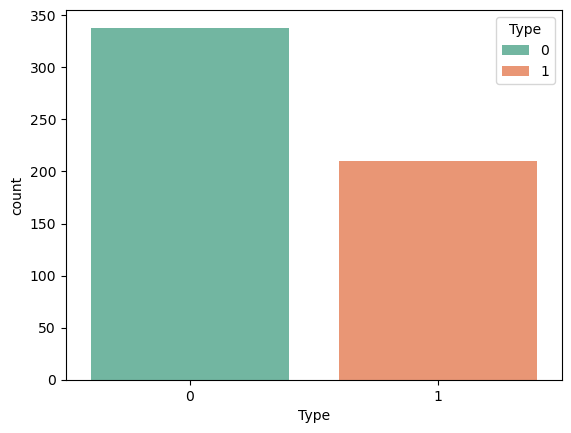

In [129]:
sns.countplot(x="Type", hue="Type", data=df, palette="Set2") # Type değişkeninin countplotunu çizdirir

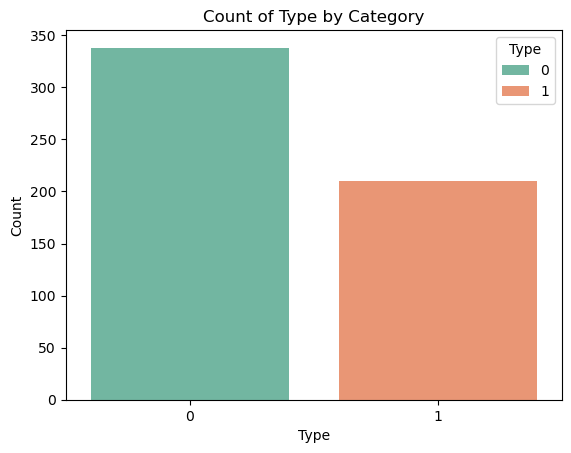

In [130]:
sns.countplot(x="Type", hue="Type", data=df, palette="Set2")
plt.title("Count of Type by Category")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

<Axes: >

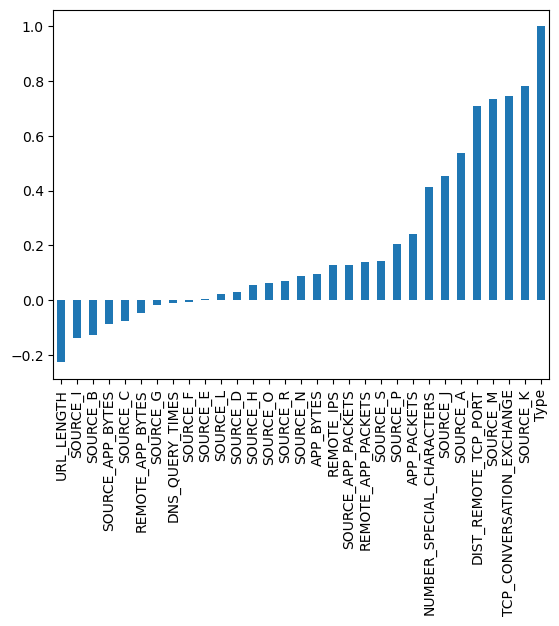

In [131]:
df.corr()["Type"].sort_values().plot(kind="bar") # Type değişkeninin diğer değişkenler ile olan korelasyonlarını barplot ile çizdirir

<code style="background:yellow;color:red">Sınıflandırma Modeli Oluşturmak</code>


veriyi ikiye böleceğiz train ve test olarak;

scale edip, training kısmına geçeceğiz

In [132]:
Y = df["Type"].values # Type değişkenini Y değişkenine atar

In [133]:
X = df.drop("Type", axis=1).values # Type kolonunu düşürüp Type değişkeni hariç tüm değişkenleri X değişkenine atar

In [134]:
from sklearn.model_selection import train_test_split # veri setini eğitim ve test seti olarak ayırmak için kullanılır

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=15) # veri setini train ve test olarak ayırır

In [136]:
#scaling işlemini yapmak için preprocessing kütüphanesinden MinMaxScaler fonksiyonunu import ediyoruz
from sklearn.preprocessing import MinMaxScaler

In [137]:
scaler = MinMaxScaler() # MinMaxScaler sınıfından bir instance oluşturma

In [138]:
scaler.fit(x_train) # x_train veri setini fit ediyoruz

MinMaxScaler()

In [139]:
x_train = scaler.transform(x_train) # x_train veri setini transform ediyoruz, 0-1 arasına çekilir

In [140]:
x_test = scaler.transform(x_test) # x_test veri setini transform ediyoruz, 0-1 arasına çekilir

In [141]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping # modelin erken durdurulması için kullanılır, overefitting problemlerini çözmek için kullanılır

In [142]:
x_train.shape # x_train değişkeninin boyutunu gösterir

(383, 30)

In [143]:
model = Sequential() # modeli oluşturuyoruz

model.add(Dense(units=30, activation="relu")) # modelin katmanlarını ekliyoruz, 30 nöron ve aktivasyon fonksiyonu relu
model.add(Dense(units=15, activation="relu")) 
model.add(Dense(units=15, activation="relu")) 

model.add(Dense(units=1, activation="sigmoid")) # çıktı katmanı, 1 nöron ve aktivasyon fonksiyonu sigmoid

#kaç tane kolon varsa o kadar nöron eklenmesi önerilir, 30 nöron eklenmesinin sebebi 30 kolon olmasıdır

model.compile(optimizer="adam", loss="binary_crossentropy") # optimizer = adam, loss = binary_crossentropy - sınıflandırma işlemi yaptığımızdan dolayı binary_crossentropy kullanıldı


In [144]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=700, verbose=1) # 

Epoch 1/700


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.6844 - val_loss: 0.6871
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6642 - val_loss: 0.6658
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6298 - val_loss: 0.6396
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5956 - val_loss: 0.6104
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5488 - val_loss: 0.5778
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4946 - val_loss: 0.5410
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4553 - val_loss: 0.4983
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4206 - val_loss: 0.4569
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3618 - val_loss: 0.4316
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3345 - val_loss: 0.3996
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2623 - val_loss: 0.3681
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2526 - val_l

<code style="background:yellow;color:red">EarlyStopping - Erken Durma</code>

In [145]:
model.history.history # modelin history'sini gösterir

{'loss': [0.6781524419784546,
  0.6524366140365601,
  0.621035099029541,
  0.5851764678955078,
  0.5424091219902039,
  0.49667829275131226,
  0.4477512836456299,
  0.4004899859428406,
  0.35280364751815796,
  0.31077831983566284,
  0.2763158082962036,
  0.24865125119686127,
  0.22338518500328064,
  0.20456604659557343,
  0.1897106170654297,
  0.17527884244918823,
  0.1664815992116928,
  0.15640389919281006,
  0.14960645139217377,
  0.13904935121536255,
  0.1342010647058487,
  0.12797211110591888,
  0.12269642949104309,
  0.11779768019914627,
  0.11379853636026382,
  0.10879868268966675,
  0.10358591377735138,
  0.10432370007038116,
  0.09840793162584305,
  0.09709734469652176,
  0.0925854742527008,
  0.0892535001039505,
  0.08764379471540451,
  0.09011373668909073,
  0.08151692152023315,
  0.08149737864732742,
  0.0794721469283104,
  0.07689334452152252,
  0.07595164328813553,
  0.07512572407722473,
  0.07988908141851425,
  0.06984809786081314,
  0.06836669892072678,
  0.06734792143106

In [146]:
model_loss = pd.DataFrame(model.history.history) # modelin history'sini model_loss değişkenine atar

<Axes: >

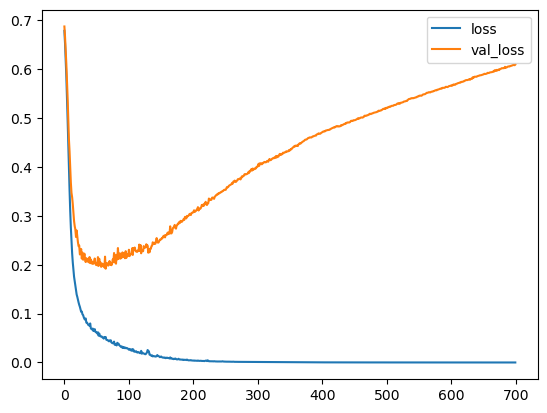

In [147]:
model_loss.plot() # model_loss değişkeninin grafiğini çizdirir

In [148]:
#overfitting problemi olduğundan val lossu durdur diyebiliyoruz, early stopping kullanarak
#epochs 700 kullandığımızdan overfitting problemi yaşandı

model = Sequential() # modeli oluşturuyoruz

model.add(Dense(units=30, activation="relu")) # modelin katmanlarını ekliyoruz, 30 nöron ve aktivasyon fonksiyonu relu
model.add(Dense(units=15, activation="relu")) 
model.add(Dense(units=15, activation="relu")) 

model.add(Dense(units=1, activation="sigmoid")) # çıktı katmanı, 1 nöron ve aktivasyon fonksiyonu sigmoid

#kaç tane kolon varsa o kadar nöron eklenmesi önerilir, 30 nöron eklenmesinin sebebi 30 kolon olmasıdır

model.compile(optimizer="adam", loss="binary_crossentropy") # optimizer = adam, loss = binary_crossentropy - sınıflandırma işlemi yaptığımızdan dolayı binary_crossentropy kullanıldı

In [149]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25) # earlyStopping fonksiyonu ile modelin erken durdurulması için kullanılır

In [150]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=700, verbose=1, callbacks=[earlyStopping]) # bu sefer callbacks ile earlyStopping fonksiyonunu ekledik, liste içerisinde yazılması gerekiyor

Epoch 1/700


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.6877 - val_loss: 0.6891
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6749 - val_loss: 0.6782
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6600 - val_loss: 0.6603
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6327 - val_loss: 0.6386
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5953 - val_loss: 0.6090
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5679 - val_loss: 0.5667
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5153 - val_loss: 0.5333
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4644 - val_loss: 0.4822
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4037 - val_loss: 0.4422
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3529 - val_loss: 0.4026
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2955 - val_loss: 0.3708
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2658 - val_l

In [151]:
model.history.history # modelin history'sini gösterir

{'loss': [0.6860595941543579,
  0.6724284887313843,
  0.6527228951454163,
  0.6248463988304138,
  0.5892972350120544,
  0.5460466146469116,
  0.4974578320980072,
  0.44672685861587524,
  0.39703667163848877,
  0.34855198860168457,
  0.3060789704322815,
  0.27109211683273315,
  0.24208538234233856,
  0.2186242640018463,
  0.19847550988197327,
  0.18277449905872345,
  0.16856177151203156,
  0.15819960832595825,
  0.15024621784687042,
  0.14229167997837067,
  0.13993966579437256,
  0.13106554746627808,
  0.12379922717809677,
  0.11897200345993042,
  0.11383861303329468,
  0.11064506322145462,
  0.10610635578632355,
  0.10541418939828873,
  0.10303287208080292,
  0.09846360236406326,
  0.09690041095018387,
  0.09281222522258759,
  0.09073006361722946,
  0.08789432793855667,
  0.0891607403755188,
  0.0863136500120163,
  0.0816228911280632,
  0.08531126379966736,
  0.07983768731355667,
  0.07758381217718124,
  0.07604802399873734,
  0.07516820728778839,
  0.07459317892789841,
  0.07595091313

In [152]:
model_loss = pd.DataFrame(model.history.history) # modelin history'sini model_loss değişkenine atar

<Axes: >

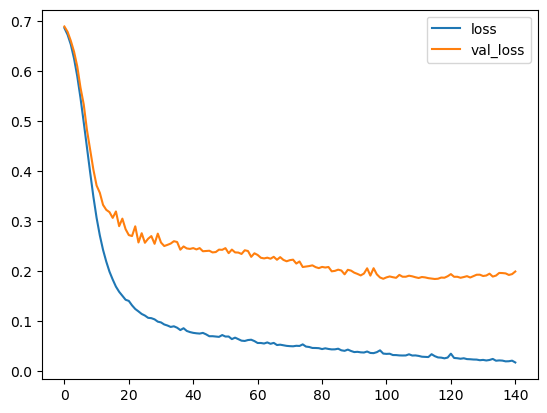

In [153]:
model_loss.plot() # model_loss değişkeninin grafiğini çizdirir

<code style="background:yellow;color:red">Dropout</code>

modelde overfitting problemine yönelik daha çok iyileştirme yapabilmek için daha önceden dropout'ı import etmiştik.

verdiğimiz rate argümanına göre yüzde kaçsa o kadar input uniti, o kadar layerı modelden atmaya başlayacak, val loss'u kontrol altında tutarak daha verimli bir model çıkarmış olacağız.

In [154]:


model = Sequential() # modeli oluşturuyoruz

model.add(Dense(units=30, activation="relu")) # modelin katmanlarını ekliyoruz, 30 nöron ve aktivasyon fonksiyonu relu
model.add(Dropout(0.6)) # dropout fonksiyonu overfitting problemlerini çözmek için kullanılır, 0.6 oranında nöronları rastgele kapatır


model.add(Dense(units=15, activation="relu")) 
model.add(Dropout(0.6))     #her katmanın sonuna dropout eklenir

model.add(Dense(units=15, activation="relu")) 
model.add(Dropout(0.6))     #her katmanın sonuna dropout eklenir

model.add(Dense(units=1, activation="sigmoid")) # çıktı katmanı, 1 nöron ve aktivasyon fonksiyonu sigmoid

#kaç tane kolon varsa o kadar nöron eklenmesi önerilir, 30 nöron eklenmesinin sebebi 30 kolon olmasıdır

model.compile(optimizer="adam", loss="binary_crossentropy") # optimizer = adam, loss = binary_crossentropy - sınıflandırma işlemi yaptığımızdan dolayı binary_crossentropy kullanıldı

In [155]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=700, verbose=1, callbacks=[earlyStopping]) # callbacks ile earlyStopping fonksiyonunu ekledik, liste içerisinde yazılması gerekiyor, droput katman sonlarına eklendi

Epoch 1/700


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.6873 - val_loss: 0.6965
Epoch 2/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7413 - val_loss: 0.6923
Epoch 3/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6800 - val_loss: 0.6894
Epoch 4/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7171 - val_loss: 0.6859
Epoch 5/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6954 - val_loss: 0.6826
Epoch 6/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6893 - val_loss: 0.6796
Epoch 7/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7052 - val_loss: 0.6770
Epoch 8/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6592 - val_loss: 0.6754
Epoch 9/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6742 - val_loss: 0.6739
Epoch 10/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6469 - val_loss: 0.6722
Epoch 11/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6409 - val_loss: 0.6703
Epoch 12/700
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6577 - val_l

In [156]:
model.history.history # modelin history'sini gösterir

{'loss': [0.6982197761535645,
  0.7208395600318909,
  0.6841267943382263,
  0.7111643552780151,
  0.6961521506309509,
  0.6862029433250427,
  0.6968947052955627,
  0.6684328317642212,
  0.6738030314445496,
  0.6565054059028625,
  0.6462659239768982,
  0.6444857716560364,
  0.6442924737930298,
  0.648407518863678,
  0.6481717824935913,
  0.628738522529602,
  0.6443293690681458,
  0.6367116570472717,
  0.6238054037094116,
  0.6250393986701965,
  0.6267843842506409,
  0.611786425113678,
  0.6119189262390137,
  0.6022006869316101,
  0.6162159442901611],
 'val_loss': [0.6964772343635559,
  0.692257285118103,
  0.6893768310546875,
  0.6859110593795776,
  0.682629406452179,
  0.6796404123306274,
  0.6770408153533936,
  0.6753843426704407,
  0.6738965511322021,
  0.6721698045730591,
  0.6703075170516968,
  0.6687268614768982,
  0.667276918888092,
  0.6653429269790649,
  0.6639768481254578,
  0.6629951000213623,
  0.6614018082618713,
  0.6594041585922241,
  0.656886637210846,
  0.65344870090484

In [157]:
lossdf = pd.DataFrame(model.history.history) # modelin history'sini lossdf değişkenine atar

<Axes: >

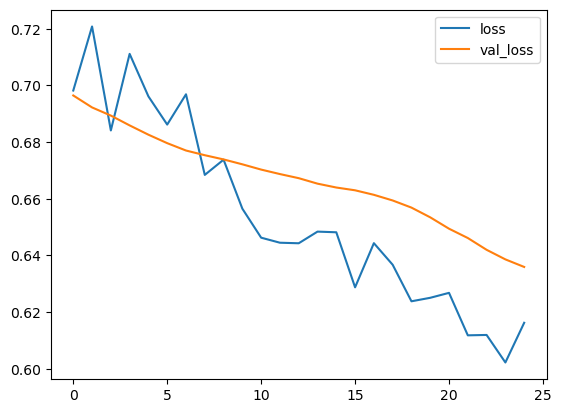

In [158]:
lossdf.plot() # lossdf değişkeninin grafiğini çizdirir

In [159]:
#tahminlere koyarsak ne oluyor?

predictions = model.predict(x_test) # modelin tahmin yapması
estimates = (predictions > 0.5).astype("int32") # tahminleri sınıf etiketlerine dönüştürme

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [160]:
from sklearn.metrics import classification_report, confusion_matrix # sklearn kütüphanesinden classification_report ve confusion_matrix fonksiyonlarını import ediyoruz

In [161]:
print(classification_report(y_test, estimates, zero_division=0)) # classification_report fonksiyonu ile sınıflandırma raporu oluşturma

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        91
           1       0.00      0.00      0.00        74

    accuracy                           0.55       165
   macro avg       0.28      0.50      0.36       165
weighted avg       0.30      0.55      0.39       165



In [162]:
print(confusion_matrix(y_test, estimates)) # confusion_matrix fonksiyonu ile karışıklık matrisi oluşturma

[[91  0]
 [74  0]]
